# Simulated Real World Phenomenon

Ian Wafer
<br>Student No. G00376322

## Purpose

The purpose of this programming project is to synthesise a dataset that simulates a real world phenomenon of our choosing. It is recommended we pick something of interest to our personal or professional life and that we use the numpy.random package to do so. The selected phenomenon needs to be measureable and for which we could collect at least 100 data points across 4 seperate variables for. We need to investigate the variables involved, their distribution in relation to each other and synthesise or simulate a data set that closely matches their properties and detail all research in a Jupyter Notebook.


## Introduction

I have decided to investigate and generate a dataset for weight lifted in a powerlifting competition. This is of interest to me as I have previously competed in powerlifting and have noticed certain trends that drive the sport forward. To ensure we generate data with some accuracy we'll need to investigate existing data on the sport and determine the relationship between the variables in it's generation.

In my investigation I will look at the following categories-
- [1. Sex](#Sex) 
- [2. Age](#Age)
- [3. Weight](#Weight)
- [4. Best Lift Numbers](#Best)
    - [4.1 Best Squat](#Squats)
    - [4.2 Best Bench Press](#Bench)
    - [4.3 Best Deadlift](#Deadlift)
- [5. Lift Totals](#Total)
- [6. Wilks Score](#Wilks)
- [7. References](#Ref)


In [92]:
#import relevant modules

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Sourced from https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline
# sets the backend of matplotlib to the 'inline' backend

%matplotlib inline 


# Set default grid style for plots

sns.set(style='darkgrid')

### 1. Sex <a id='Sex'></a>

First we'll look at the sex of the dataset required. From the source listed in the below code we can see that males make up about 63% of the pool while females cover the remaining 37%. Here we can use the numpy.random.choice function to generate the quantity of males and females in the random data generation. NumPy.random.choice will generate a 1 dimnensional array of the required data in the proprtions entered in the probability chance of the event occuring.

['Male' 'Male' 'Female' ... 'Male' 'Female' 'Male']


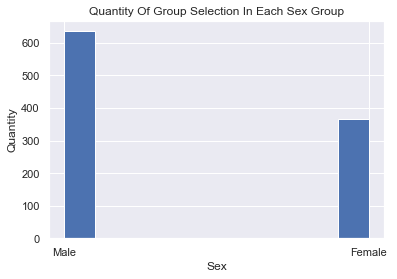

,Sex
996,Male
997,Female
998,Male
999,Female
1000,Male


In [93]:
# Source of info https://www.ncbi.nlm.nih.gov/pubmed/28682930
# Generate an array of 1,000 with the Sex aligned to either male or female in the probabilities shown by p=

Sex = ['Male', 'Female']
Sex = np.random.choice(Sex, 1001, p=[0.63, 0.37])
print(Sex)

# Plot the graph with ameneded labels as below

plt.hist(Sex)
plt.title('Quantity Of Group Selection In Each Sex Group')
plt.ylabel('Quantity')
plt.xlabel('Sex')
plt.show()

# Create a new dataframe with a column of Male and Female listed with Sex as its heading

NewDF = pd.DataFrame(Sex, columns=['Sex'])
NewDF.tail()

### 2. Age<a id='Age'></a>

In powerlifting there is a wide range of ages from teenagers to senior citizens. To find the trend in lifting age to be expected we will load up a dataset taken from the American Open Powerlfiting database as of 2019. As this database is very large we will only be looking at the first 10,000 rows and rather than the individual ages we will be look at age categories as this is generally how the competition is broken down together with bodyweight categories.


In [94]:
# Sourced from https://stackoverflow.com/a/23853569
# Dataset taken from https://www.kaggle.com/open-powerlifting/powerlifting-database
# Database to read only the first 10,000 lines as it contains tens of thousands which would be time consuming to load. 

df = pd.read_csv('openpowerlifting.csv', nrows=10000)

# Sourced from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
# Delete irrelevant columns 

df = df.drop(columns= ['Name', 'Equipment', 'Event', 'Age', 'Division', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg',
       'Squat3Kg', 'Squat4Kg', 'Bench1Kg', 'Bench2Kg',
       'Bench3Kg', 'Bench4Kg', 'Deadlift1Kg',
       'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg', 'Place', 'Wilks', 'McCulloch', 'Glossbrenner',
       'IPFPoints', 'Tested', 'Country', 'Federation', 'Date',
       'MeetCountry', 'MeetState', 'MeetName'])

# Check dataframe

df.head()

,Sex,AgeClass,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg
0,F,24-34,59.8,105.0,55.0,130.0,290.0
1,F,24-34,58.5,120.0,67.5,145.0,332.5
2,F,40-44,55.4,NaN,32.5,NaN,32.5
3,F,20-23,60.0,105.0,72.5,132.5,310.0
4,F,45-49,104.0,140.0,80.0,170.0,390.0


In [95]:
# Values must be positive so check for any dirty data negative values in all float columns

print('Squat negatives at locations', df[df['Best3SquatKg'] < 0].index)
print('Bench negatives at locations', df[df['Best3BenchKg'] < 0].index)
print('Deadlift negatives at locations', df[df['Best3DeadliftKg'] < 0].index)
print('Bodyweight negatives at locations', df[df['BodyweightKg'] < 0].index)
print('Total negatives at locations', df[df['TotalKg'] < 0].index)

Squat negatives at locations Int64Index([1347, 5349, 5633, 5662, 6712, 7080], dtype='int64')
Bench negatives at locations Int64Index([309, 3470, 5607, 5633, 5700, 5703, 6182], dtype='int64')
Deadlift negatives at locations Int64Index([], dtype='int64')
Bodyweight negatives at locations Int64Index([], dtype='int64')
Total negatives at locations Int64Index([], dtype='int64')


In [96]:
# Remove all dirty data of negative lift values

df.drop([1347, 5349, 5633, 5662, 6712, 7080, 309, 3470, 5607, 5700, 5703, 6182], axis = 0, inplace = True)

Text(0.5, 0, 'Quantity')

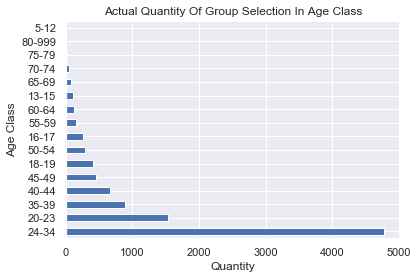

In [97]:
# Sourced from https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib
# Graph the age breakdown from the dataset

df['AgeClass'].value_counts().plot(kind='barh')
plt.title('Actual Quantity Of Group Selection In Age Class')
plt.ylabel('Age Class')
plt.xlabel('Quantity')

The above bar chart is a breakdown of the age groups by quantity out of a total of the sample of 10,000. We can clearly see that the 24-34 age group dominates the field with almost 50% of the competitors. Trailing behind then is the 20-23 age group at about 15% and then the 35-44 age group at about 8% with the remaining field taking up 5% or close to 1% in the end cases. We will only count the age groups up to 64 as the others are so small as to be ignored. With this data we can once again use the numpy.random.choice fucntion as directed above to provide an array of the data we need.

['40-44' '24-34' '24-34' ... '40-44' '20-23' '20-23']


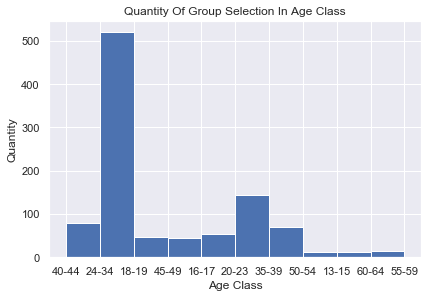

,Sex,Age Class
996,Male,35-39
997,Female,24-34
998,Male,40-44
999,Female,20-23
1000,Male,20-23


In [98]:
# Use random.choice function with relation to the above functions to generate a sampling of ages in the dataset with the probabilities determined from the open powerlifting dataset used. 

Age = ['13-15', '16-17', '18-19', '20-23', '24-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64']
Age = np.random.choice(Age, 1001, p=[0.01, 0.05, 0.05, 0.15, 0.5, 0.08, 0.08, 0.05, 0.01, 0.01, 0.01])
print(Age)

# Plot the graph to get an idea of the numbers in each category

plt.hist(Age)
plt.tight_layout()
plt.title('Quantity Of Group Selection In Age Class')
plt.ylabel('Quantity')
plt.xlabel('Age Class')
plt.show()

# Insert new column onto the previously created dataframe labeled Age Class with the results of the above random generation

NewDF.insert(1, 'Age Class', Age, True)

# Check dataframe

NewDF.tail()

From the above data we can see that we have gotten roughly the same proportions as the graph taken from the empirical data with a few variations. This makes it a suitable formula to use in the data set generation.

### 3. Weight<a id='Weight'></a>

Weight is another important variable in powerlifitng. It is generally thought that the heavier someone is the more weight they can push within reason. This obviously peaks out at certain stages and the amount lifted as a ratio of total bodyweight quickly falls away as the numbers go up. This category will need to be broken into male and female weights as these tend to greatly differ. Here we'd expect men to be on the heavier than women but we'll need to test the data to determine the relationship to make effective data. While previously we used age class here we will use the persons weight as it has more of a direct influence on the amount of weight lifted when we get to that phase of the data generation.


In [99]:
# Determine the mean and standard deviation

df[['BodyweightKg','Sex']].groupby('Sex').describe().transpose()

Sex                           F            M
BodyweightKg count  3072.000000  6914.000000
             mean     72.233483    96.696743
             std      18.859089    19.953721
             min      40.800000    48.950000
             25%      59.300000    82.100000
             50%      67.200000    94.400000
             75%      80.800000   108.000000
             max     164.100000   194.000000

From the above we can see that the average bodyweight between the sexes has a large difference with 72 kg for females and 97 kg for males but with quite similar standard deviation at 19 for females and 20 for males. We'll now use these values to generate some data together with the previously generated sex column.

[90.5 68.3 75.3 ... 74.9 60.9 69.5]


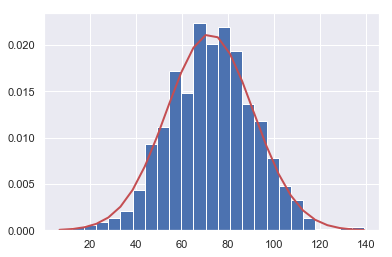

In [100]:
# Sourced from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
# Determine formula for generating the correct weight for females

F_Mu = 72.23
F_Sigma = 18.86
F_Weight = np.random.normal(F_Mu, F_Sigma, 1001).round(1)
print(F_Weight)


# Plot the probability density line in red

count, bins, ignored = plt.hist(F_Weight, 25, density=True)
plt.plot(bins, 1/(F_Sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - F_Mu)**2 / (2 * F_Sigma**2) ),
         linewidth=2, color='r')
plt.show()

[101.7  72.4  76.9 ...  85.2 100.5  61.7]


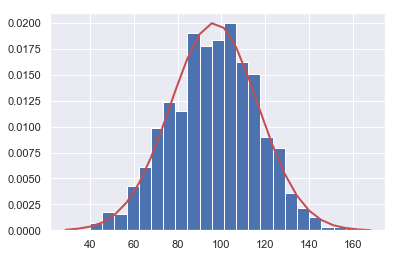

In [101]:
# determine formula for generating the correct weight for males

M_Mu = 96.7
M_Sigma = 19.95
M_Weight = np.random.normal(M_Mu, M_Sigma, 1001).round(1)
print(M_Weight)

# Plot the probability density line in red

count, bins, ignored = plt.hist(M_Weight, 25, density=True)
plt.plot(bins, 1/(M_Sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - M_Mu)**2 / (2 * M_Sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [102]:
# Sourced from https://stackoverflow.com/a/43391654
# Use np.where function with above random choice formula to plot the correct formula into the new column

NewDF['Weight (kg)'] = np.where(NewDF['Sex'] == 'Female', np.random.normal(F_Mu, F_Sigma, 1001).round(1), np.random.normal(M_Mu, M_Sigma, 1001).round(1))

# Check dataframe

NewDF.head(20)

,Sex,Age Class,Weight (kg)
0,Male,40-44,108.2
1,Male,24-34,111.5
2,Female,24-34,71.8
3,Male,24-34,147.5
4,Male,18-19,118.8
5,Male,45-49,108.8
6,Male,16-17,116.2
7,Male,24-34,86.0
8,Male,24-34,123.2
9,Male,18-19,99.7


### 4. Best Lift Numbers<a id='Best'></a>
To generate some realistic values of weight lifted we'll need to calculate the mean value of weight lifted for males and females and the standard deviation of this to show the wide variety within the competition. We will again use the open powerlifting dataset to get an idea of the values we're looking at. It is widely considered standard that there is a relationship between the sex and the persons bodyweight to how much they will lift so we will first break the dataset down into two seperate datasets of male and female. For this exercise we will also remove all rows with no data in any of the columns. This will remove the single lift competition data which could skew the results lowering the average values.

In [103]:
# Remove values with no entries from the dataset

df.dropna(inplace=True)

In [104]:
# Sourced from https://stackoverflow.com/q/11869910
# Create a dataframe of just males 

df_M = df[df['Sex'] == 'M']

# Create a dataframe of just females 

df_F = df[df['Sex'] == 'F']

Now that we have the dataset broken down into new datasets containing only the female values and only the male values we can use Pandas to determine the mean value attained and standard deviation and use this information for our squat, bench and deadlift data generation.

In [105]:
df_M.describe()

,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg
count,4975.000000,4975.00000,4975.000000,4975.000000,4975.000000
mean,96.402842,221.41809,140.971357,237.977789,600.365427
std,19.758776,56.36455,36.160369,45.717170,127.910566
min,48.950000,30.00000,20.000000,40.000000,162.500000
25%,82.000000,185.00000,115.000000,210.000000,515.000000
50%,94.000000,220.00000,140.000000,240.000000,600.000000
75%,107.525000,260.00000,162.500000,270.000000,687.500000
max,191.000000,410.00000,365.000000,400.000000,1045.000000


In [106]:
df_F.describe()

,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg
count,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000
mean,72.148601,124.753447,66.684915,142.214720,333.651054
std,18.919188,33.877976,17.527546,27.637729,73.675745
min,40.900000,30.000000,22.500000,45.000000,97.500000
25%,59.200000,100.000000,55.000000,125.000000,282.500000
50%,67.100000,122.500000,65.000000,140.000000,330.000000
75%,80.800000,145.000000,77.500000,160.000000,380.000000
max,164.100000,250.000000,140.000000,250.000000,610.000000


Now that we have the mean and standard deviation for both males and females on all lifts we'll need to determine the relationship between weight lifted and bodyweight. To do this we will plot the graphs with the regression line indicated and use the np.polyfit function to determine the slope showing the predicted progression of amount lifted with increasing bodyweight.

#### 4.1 Squats<a id='Squats'></a>

The squat is performed beginning in the upright position. The barbell is unloaded from the rack and walked back into a safe position. The lifter is then given the command 'Start' where they will squat down and stand up in one continuous motion. At the the top when they have securely locked out there knees to show a fully completed lift they will be given the command 'Rack' at which time they will step the bar forward and safely lower the weight on to the provided hooks. For further details see [HERE](https://www.powerliftingtowin.com/powerlifting-squat-rules/). Using the open powerlifting dataset we can determine the regression lines and together with the standard deviation and bodyweight column we can caluclate the appropriate data dispersion. 

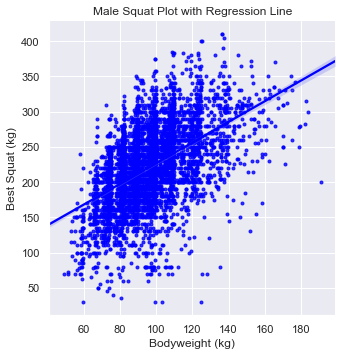

The values of the slope and constant for the male squat respectively are [ 1.46697605 79.99742973]


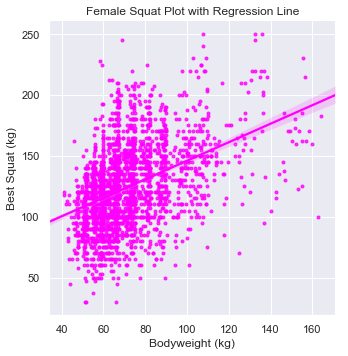

The values of the slope and constant for the female squat respectively are [ 0.76054674 69.88106392]


In [107]:
# Squat relationship plotted for males

sns.lmplot(x='BodyweightKg', y='Best3SquatKg', 
           palette=['blue'], hue='Sex', markers='.',
           legend=None,
           data=df_M)

# Calculate best values for m (slope) and c (constant)

Bw_list_M = df_M[df_M.columns[2]].tolist() # Convert BodyweightKg column into a list
S_list_M = df_M[df_M.columns[3]].tolist() # Convert Best3SquatKg column into a list

# Plot the polyfit line for male squats

plt.title('Male Squat Plot with Regression Line')
plt.xlabel('Bodyweight (kg)')
plt.ylabel('Best Squat (kg)')
plt.show()

print('The values of the slope and constant for the male squat respectively are', np.polyfit(Bw_list_M, S_list_M, 1)) 

# Squat relationship plotted for females

sns.lmplot(x='BodyweightKg', y='Best3SquatKg', 
           palette=['magenta'], hue='Sex', markers='.',
           legend=None,
           data=df_F)

# Calculate best values for m (slope) and c (constant)

Bw_list_F = df_F[df_F.columns[2]].tolist() # Convert BodyweightKg column into a list
S_list_F = df_F[df_F.columns[3]].tolist() # Convert Best3SquatKg column into a list

# Plot the polyfit line for female squats

plt.title('Female Squat Plot with Regression Line')
plt.xlabel('Bodyweight (kg)')
plt.ylabel('Best Squat (kg)')
plt.show()

print('The values of the slope and constant for the female squat respectively are', np.polyfit(Bw_list_F, S_list_F, 1)) 

From the above we have determined an approximation of what the relationship is between bodyweight and weight lifted for both male and female lifters. With this knowledge and the standard deviation taken from the above pandas df.descrbe function we can generate new data for the dataset we are creating. 

In [108]:
# Using the bodyweight generate realistic lift numbers taking into account standard deviation for both males and female

MSq_Mu = NewDF['Weight (kg)']*1.47+80
MSq_Sigma = 56.36

FSq_Mu = NewDF['Weight (kg)']*0.76+70
FSq_Sigma = 33.88

# Generate new column for Best Squat lift. Formula and numbers used to be based on Sex assigned already in column 0

NewDF['Best Squat (kg)'] = np.where(NewDF['Sex'] == 'Male', np.random.normal(MSq_Mu, MSq_Sigma, 1001).round(), np.random.normal(FSq_Mu, FSq_Sigma, 1001).round())

NewDF.head()

,Sex,Age Class,Weight (kg),Best Squat (kg)
0,Male,40-44,108.2,184.0
1,Male,24-34,111.5,312.0
2,Female,24-34,71.8,150.0
3,Male,24-34,147.5,297.0
4,Male,18-19,118.8,217.0


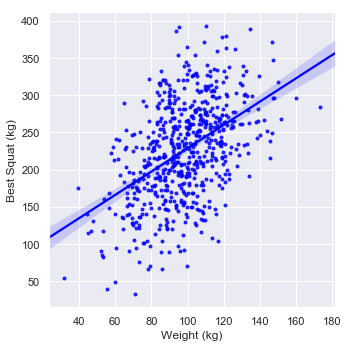

The values of the slope and constant for the male squat respectively are [ 1.56749156 71.97213197] in the generated dataset


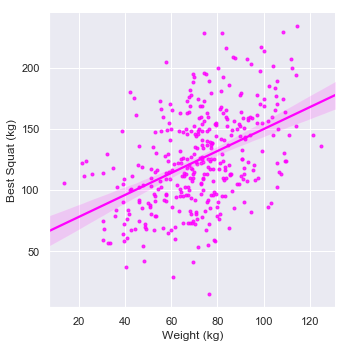

The values of the slope and constant for the female squat are respectively are [ 0.8969213  60.08231081] in the generated dataset


In [109]:
# Check the newly generated squat values to compare against the original dataset to check if the values closely match.

# Filter new dataset values to male only

df_M1 = NewDF[NewDF['Sex'] == 'Male']

sns.lmplot(x='Weight (kg)', y='Best Squat (kg)', 
           palette=['blue'], hue='Sex', markers='.',
           legend=None,
           data=df_M1)
plt.show()

Bw_list_M1 = df_M1[df_M1.columns[2]].tolist() # Convert BodyweightKg column into a list
S_list_M1 = df_M1[df_M1.columns[3]].tolist() # Convert Best3SquatKg column into a list

print('The values of the slope and constant for the male squat respectively are', np.polyfit(Bw_list_M1, S_list_M1, 1), 'in the generated dataset') 

# Filter new dataset values to female only

df_F1 = NewDF[NewDF['Sex'] == 'Female']

sns.lmplot(x='Weight (kg)', y='Best Squat (kg)', 
           palette=['magenta'], hue='Sex', markers='.',
           legend=None,
           data=df_F1)
plt.show()

Bw_list_F1 = df_F1[df_F1.columns[2]].tolist() # Convert BodyweightKg column into a list
S_list_F1 = df_F1[df_F1.columns[3]].tolist() # Convert Best3SquatKg column into a list

print('The values of the slope and constant for the female squat are respectively are', np.polyfit(Bw_list_F1,S_list_F1, 1), 'in the generated dataset')

From the above we can see that the newly generated data closely matches the data from the empirical evidence gathered and is therefore a suitable form of generation.

### 4.2 Bench Press<a id='Bench'></a>
The bench press is performed by lying down on a bench and unracking the bar by themselves or with the  help of the staff. Once the weight is steady and the lifter is in full control of the weight they will be given the comand 'Start'. The lifter will then lower the weight to their chest where they are to demonstrate a steady paused hold. Once the judge is happy the lifter has paused the weight they will give the command 'Press' at which point the lifter will push the barbell back up to the starting position. Once steady in this position the judge will then give the command 'Rack' where the lifter will safely bring the bar back to the hooks with the help of the staff. For further details see [HERE](https://www.powerliftingtowin.com/powerlifting-rules-bench-press/). Now we will repeat the above steps in determining the best fit values for the bench press in our data generation. Generally speaking the bench press is the weakest lift of the 3 lifts in powerlifting. This is due to the relatively smaller muscles used to perform this exercise when compared with the squat and deadlift which are largely driven by th elegs and back muscles respectively. Below we will use the same method as above to determine the predicted bench press lifts.

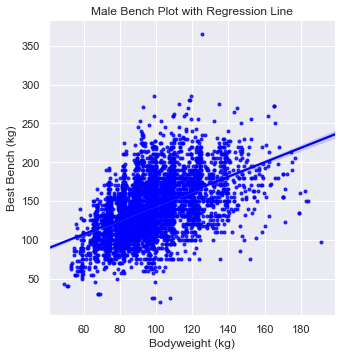

The values of the slope and constant for the male bench respectively are [ 0.92723382 51.58338154]


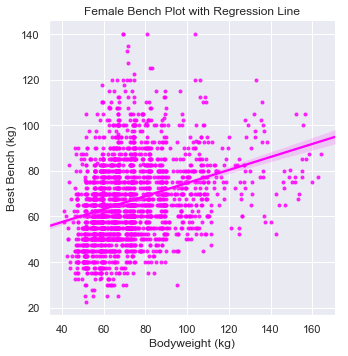

The values of the slope and constant for the female bench respectively are [ 0.28589339 46.05810679]


In [110]:
# Bench relationship plotted for males

sns.lmplot(x='BodyweightKg', y='Best3BenchKg', 
           palette=['blue'], hue='Sex', markers='.',
           legend=None,
           data=df_M)

# Calculate best values for m (slope) and c (constant)

Bw_list_M = df_M[df_M.columns[2]].tolist() # Convert BodyweightKg column into a list
B_list_M = df_M[df_M.columns[4]].tolist() # Convert Best3SquatKg column into a list

# Plot the polyfit line for male bench

plt.title('Male Bench Plot with Regression Line')
plt.xlabel('Bodyweight (kg)')
plt.ylabel('Best Bench (kg)')
plt.show()

print('The values of the slope and constant for the male bench respectively are', np.polyfit(Bw_list_M, B_list_M, 1)) 

df_F = df[df['Sex'] == 'F']

# Bench relationship plotted for females

sns.lmplot(x='BodyweightKg', y='Best3BenchKg', 
           palette=['magenta'], hue='Sex', markers='.',
           legend=None,
           data=df_F)

# Calculate best values for m (slope) and c (constant)

Bw_list_F = df_F[df_F.columns[2]].tolist() # Convert BodyweightKg column into a list
B_list_F = df_F[df_F.columns[4]].tolist() # Convert Best3SquatKg column into a list

# Plot the polyfit line for female bench

plt.title('Female Bench Plot with Regression Line')
plt.xlabel('Bodyweight (kg)')
plt.ylabel('Best Bench (kg)')
plt.show()

print('The values of the slope and constant for the female bench respectively are', np.polyfit(Bw_list_F, B_list_F, 1)) 

From the above we have determined an approximation of what the relationship is between bodyweight and weight lifted for both male and female lifters. With this knowledge and the standard deviation taken from the above pandas df.descrbe function we can generate new data for the dataset we are creating. 

In [111]:
# Need to take bodyweight into account using formulas dervied above

MBe_Mu = NewDF['Weight (kg)']*0.93+52
MBe_Sigma = 36.16

FBe_Mu = NewDF['Weight (kg)']*0.29+46
FBe_Sigma = 17.53

NewDF['Best Bench (kg)'] = np.where(NewDF['Sex'] == 'Male', np.random.normal(MBe_Mu, MBe_Sigma, 1001).round(), np.random.normal(FBe_Mu, FBe_Sigma, 1001).round())

NewDF.head()

,Sex,Age Class,Weight (kg),Best Squat (kg),Best Bench (kg)
0,Male,40-44,108.2,184.0,208.0
1,Male,24-34,111.5,312.0,163.0
2,Female,24-34,71.8,150.0,45.0
3,Male,24-34,147.5,297.0,226.0
4,Male,18-19,118.8,217.0,148.0


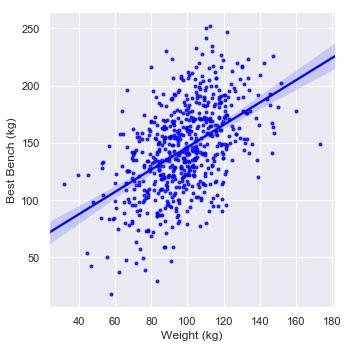

The values of the slope and constant for the male bench respectively are [ 0.97593906 48.57389413] in the generated dataset


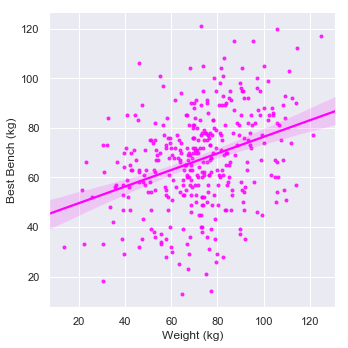

The values of the slope and constant for the female bench are respectively are [ 0.3339892  42.93585989] in the generated dataset


In [112]:
# Check the newly generated bench values to compare against the original dataset to check if the values closely match.

# Filter new dataset values to male only

df_M2 = NewDF[NewDF['Sex'] == 'Male']

sns.lmplot(x='Weight (kg)', y='Best Bench (kg)', 
           palette=['blue'], hue='Sex', markers='.',
           legend=None,
           data=df_M2)
plt.show()

Bw_list_M2 = df_M2[df_M2.columns[2]].tolist() # Convert BodyweightKg column into a list
B_list_M2 = df_M2[df_M2.columns[4]].tolist() # Convert Best3BenchKg column into a list

print('The values of the slope and constant for the male bench respectively are', np.polyfit(Bw_list_M2, B_list_M2, 1), 'in the generated dataset') 

# Filter new dataset values to female only

df_F2 = NewDF[NewDF['Sex'] == 'Female']

sns.lmplot(x='Weight (kg)', y='Best Bench (kg)', 
           palette=['magenta'], hue='Sex', markers='.',
           legend=None,
           data=df_F2)
plt.show()

Bw_list_F2 = df_F2[df_F2.columns[2]].tolist() # Convert BodyweightKg column into a list
B_list_F2 = df_F2[df_F2.columns[4]].tolist() # Convert Best3BenchKg column into a list

print('The values of the slope and constant for the female bench are respectively are', np.polyfit(Bw_list_F2,B_list_F2, 1), 'in the generated dataset')

### 4.3 Deadlift<a id='Deadlift'></a>
The deadlift is performed in the upright position. When the bar ius loaded and in place the judge gives the command 'The bar is loaded'. The lifter then must lift the bar to an upright position with knees locked out and shoulders back. For further details see [HERE](https://www.powerliftingtowin.com/powerlifting-rules-deadlift/). The deadlift is usually the largest of the 3 lifts. Once again we will use a similar method as above to determine the correct data to generate for this. 

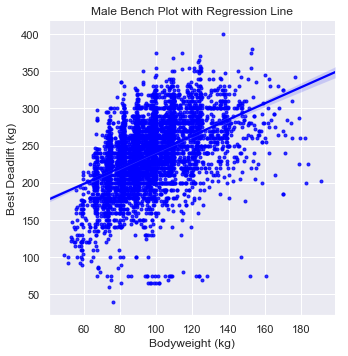

The values of the slope and constant for the male bench respectively are [  1.08246863 133.62473618]


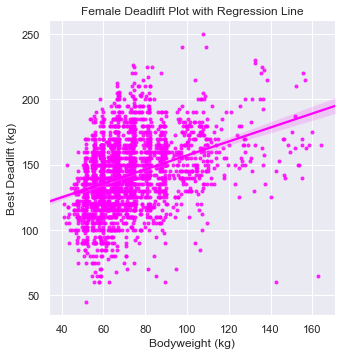

The values of the slope and constant for the female Deadlift respectively are [  0.5347434  103.63373185]


In [113]:
# Deadlift relationship plotted for males

sns.lmplot(x='BodyweightKg', y='Best3DeadliftKg', 
           palette=['blue'], hue='Sex', markers='.',
           legend=None,
           data=df_M)

# Calculate best values for m (slope) and c (constant)

Bw_list_M = df_M[df_M.columns[2]].tolist() # Convert BodyweightKg column into a list
D_list_M = df_M[df_M.columns[5]].tolist() # Convert Best3SquatKg column into a list

# Plot the polyfit line for male deadlift

plt.title('Male Bench Plot with Regression Line')
plt.xlabel('Bodyweight (kg)')
plt.ylabel('Best Deadlift (kg)')
plt.show()

print('The values of the slope and constant for the male bench respectively are', np.polyfit(Bw_list_M, D_list_M, 1)) 

# Deadlift relationship plotted for females

sns.lmplot(x='BodyweightKg', y='Best3DeadliftKg', 
           palette=['magenta'], hue='Sex', markers='.',
           legend=None,
           data=df_F)

# Calculate best values for m (slope) and c (constant)

Bw_list_F = df_F[df_F.columns[2]].tolist() # Convert BodyweightKg column into a list
D_list_F = df_F[df_F.columns[5]].tolist() # Convert Best3SquatKg column into a list

# Plot the polyfit line for female deadlift

plt.title('Female Deadlift Plot with Regression Line')
plt.xlabel('Bodyweight (kg)')
plt.ylabel('Best Deadlift (kg)')
plt.show()

print('The values of the slope and constant for the female Deadlift respectively are', np.polyfit(Bw_list_F, D_list_F, 1)) 

From the above we have determined an approximation of what the relationship is between bodyweight and weight lifted for both male and female lifters. With this knowledge and the standard deviation taken from the above pandas df.descrbe function we can generate new data for the dataset we are creating. 

In [114]:
# Need to take bodyweight into account using formulas dervied above

MDe_Mu = NewDF['Weight (kg)']*1.08+134
MDe_Sigma = 45.71

FDe_Mu = NewDF['Weight (kg)']*0.53+104
FDe_Sigma = 27.64

NewDF['Best Deadlift (kg)'] = np.where(NewDF['Sex'] == 'Male', np.random.normal(MDe_Mu, MDe_Sigma, 1001).round(), np.random.normal(FDe_Mu, FDe_Sigma, 1001).round())

NewDF.head()

,Sex,Age Class,Weight (kg),Best Squat (kg),Best Bench (kg),Best Deadlift (kg)
0,Male,40-44,108.2,184.0,208.0,283.0
1,Male,24-34,111.5,312.0,163.0,264.0
2,Female,24-34,71.8,150.0,45.0,112.0
3,Male,24-34,147.5,297.0,226.0,306.0
4,Male,18-19,118.8,217.0,148.0,275.0


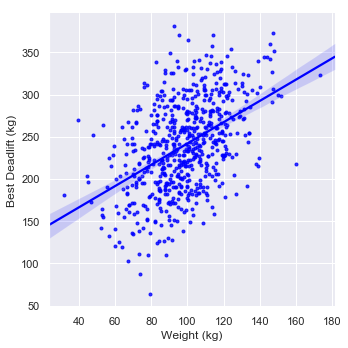

The values of the slope and constant for the male deadlift respectively are [  1.26039816 115.99244392] in the generated dataset


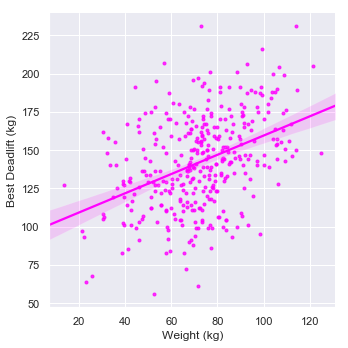

The values of the slope and constant for the female deadlift are respectively are [ 0.62851584 96.61302997] in the generated dataset


In [115]:
# Check the newly generated deadlift values to compare against the original dataset to check if the values closely match.

# Filter new dataset values to male only

df_M3 = NewDF[NewDF['Sex'] == 'Male']

sns.lmplot(x='Weight (kg)', y='Best Deadlift (kg)', 
           palette=['blue'], hue='Sex', markers='.',
           legend=None,
           data=df_M3)
plt.show()

Bw_list_M3 = df_M3[df_M3.columns[2]].tolist() # Convert BodyweightKg column into a list
B_list_M3 = df_M3[df_M3.columns[5]].tolist() # Convert Best3DeadliftKg column into a list

print('The values of the slope and constant for the male deadlift respectively are', np.polyfit(Bw_list_M3, B_list_M3, 1), 'in the generated dataset') 

# Filter new dataset values to female only

df_F3 = NewDF[NewDF['Sex'] == 'Female']

sns.lmplot(x='Weight (kg)', y='Best Deadlift (kg)', 
           palette=['magenta'], hue='Sex', markers='.',
           legend=None,
           data=df_F3)
plt.show()

Bw_list_F3 = df_F3[df_F3.columns[2]].tolist() # Convert BodyweightKg column into a list
B_list_F3 = df_F3[df_F3.columns[5]].tolist() # Convert Best3DeadliftKg column into a list

print('The values of the slope and constant for the female deadlift are respectively are', np.polyfit(Bw_list_F3,B_list_F3, 1), 'in the generated dataset')

## 5. Lift Totals<a id='Total'></a> 
This is simply the summation of the squat, bench press and deadlift columns to determine the lifters total amount lifted to be used in the wilks score calculator in section 6. 

In [116]:
# Total to be the sum of the squat, bench and deadlift column

NewDF['Total (kg)']=NewDF['Best Squat (kg)']+NewDF['Best Bench (kg)']+NewDF['Best Deadlift (kg)']

NewDF.head()

,Sex,Age Class,Weight (kg),Best Squat (kg),Best Bench (kg),Best Deadlift (kg),Total (kg)
0,Male,40-44,108.2,184.0,208.0,283.0,675.0
1,Male,24-34,111.5,312.0,163.0,264.0,739.0
2,Female,24-34,71.8,150.0,45.0,112.0,307.0
3,Male,24-34,147.5,297.0,226.0,306.0,829.0
4,Male,18-19,118.8,217.0,148.0,275.0,640.0


## 6. Wilks Score<a id='Wilks'></a> 
The final column will be the lifters wilks score. This is a formula developed by Robert Wilks based on the mens and womens world record holders and the top 2 performers for each event in the IPF's 1996 and 1997 World Championships. This is the final score that will be used in determining the winners in the various catoegories of the competition.

In [117]:
# Sourced from https://www.omnicalculator.com/sports/wilks#the-wilks-formula
# Wilks coefficient = W * 500 / (a + bx +cx² +dx³ +ex⁴ +fx⁵)

# Define males constants

M_a = -216.0475144
M_b = 16.2606339
M_c = -0.002388645
M_d = -0.00113732
M_e = 0.00000701863
M_f = -0.00000001291

# Wilks for males

M_Wilks = NewDF['Total (kg)']*500/(M_a+M_b*NewDF['Weight (kg)']+M_c*NewDF['Weight (kg)']**2+M_d*NewDF['Weight (kg)']**3+M_e*NewDF['Weight (kg)']**4+M_f*NewDF['Weight (kg)']**5)

# Define females constants

F_a = 594.31747775582
F_b = -27.23842536447
F_c = 0.82112226871
F_d = -0.00930733913
F_e = 0.00004731582
F_f = -0.00000009054

# Wilks for females

F_Wilks = NewDF['Total (kg)']*500/(F_a+F_b*NewDF['Weight (kg)']+F_c*NewDF['Weight (kg)']**2+F_d*NewDF['Weight (kg)']**3+F_e*NewDF['Weight (kg)']**4+F_f*NewDF['Weight (kg)']**5)

#Check whether male or female and apply the correct formula to the newly generated dataset

NewDF['Wilks Score'] = np.where(NewDF['Sex'] == 'Male', M_Wilks.round(2), F_Wilks.round(2))

#Check data generated correctly

NewDF.head()

,Sex,Age Class,Weight (kg),Best Squat (kg),Best Bench (kg),Best Deadlift (kg),Total (kg),Wilks Score
0,Male,40-44,108.2,184.0,208.0,283.0,675.0,399.30
1,Male,24-34,111.5,312.0,163.0,264.0,739.0,433.13
2,Female,24-34,71.8,150.0,45.0,112.0,307.0,300.20
3,Male,24-34,147.5,297.0,226.0,306.0,829.0,459.77
4,Male,18-19,118.8,217.0,148.0,275.0,640.0,368.82


## 7. References<a id='Ref'></a> 
[[1]](https://pandas.pydata.org/) Python Data Analysis Library
<br>[[2]](https://seaborn.pydata.org/) Seaborn: Statistical Data Visulaization
<br>[[3]](https://numpy.org/) NumPy Library
<br>[[4]](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html) SciPy.org Random Sampling
<br>[[5]](https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/) The Pandas DataFrame – loading, editing, and viewing data in Python
<br>[[6]](https://stackoverflow.com/questions/45264141/convert-array-into-dataframe-in-python/54150900) Stack Overflow- convert array into DataFrame in Python
<br>[[7]](https://www.ncbi.nlm.nih.gov/pubmed/28682930) Analysis of USA Powerlifting Federation Data From January 1, 2012-June 11, 2016.
<br>[[8]](https://towardsdatascience.com/powerlifting-data-and-exploratory-data-analysis-part-1-6f21d79ac5db) Powerlifting Data  and Exploratory Data Analysis Part 1
<br>[[9]](https://www.omnicalculator.com/sports/wilks#the-wilks-formula) Wilks Calculator
<br>[[10]](https://www.powerliftingtowin.com/) Powerlifting To Win